<a href="https://colab.research.google.com/github/utpalrtw/Skillhigh/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Sales Forecast.csv')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [5]:
# Display basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\n=== BASIC INFORMATION ===")
print(df.info())

print("\n=== DESCRIPTIVE STATISTICS ===")
print(df.describe())

# Data Preprocessing
print("\n=== DATA PREPROCESSING ===")

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

=== DATASET OVERVIEW ===
Dataset shape: (9800, 18)

First 5 rows:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale 

In [6]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [7]:
# Extract time-based features
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Quarter'] = df['Order Date'].dt.quarter
df['Order Day'] = df['Order Date'].dt.day

print("\nDate columns converted and time features extracted")


Date columns converted and time features extracted


### Exploratory Data Analysis

In [8]:
# 1. Sales Analysis
print("\n1. SALES ANALYSIS")
print(f"Total Sales: ${df['Sales'].sum():,.2f}")
print(f"Average Sales per Order: ${df['Sales'].mean():.2f}")
print(f"Maximum Single Sale: ${df['Sales'].max():.2f}")
print(f"Minimum Single Sale: ${df['Sales'].min():.2f}")


1. SALES ANALYSIS
Total Sales: $2,261,536.78
Average Sales per Order: $230.77
Maximum Single Sale: $22638.48
Minimum Single Sale: $0.44


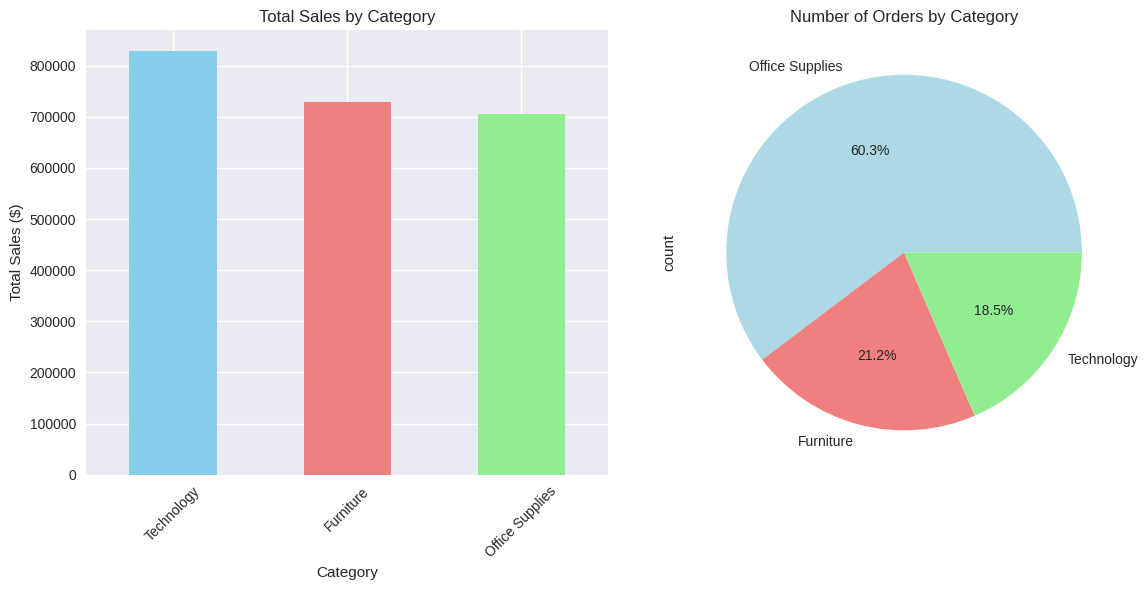

In [9]:
# 2. Sales by Category
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
category_count = df['Category'].value_counts()
category_count.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Number of Orders by Category')

plt.tight_layout()
plt.show()

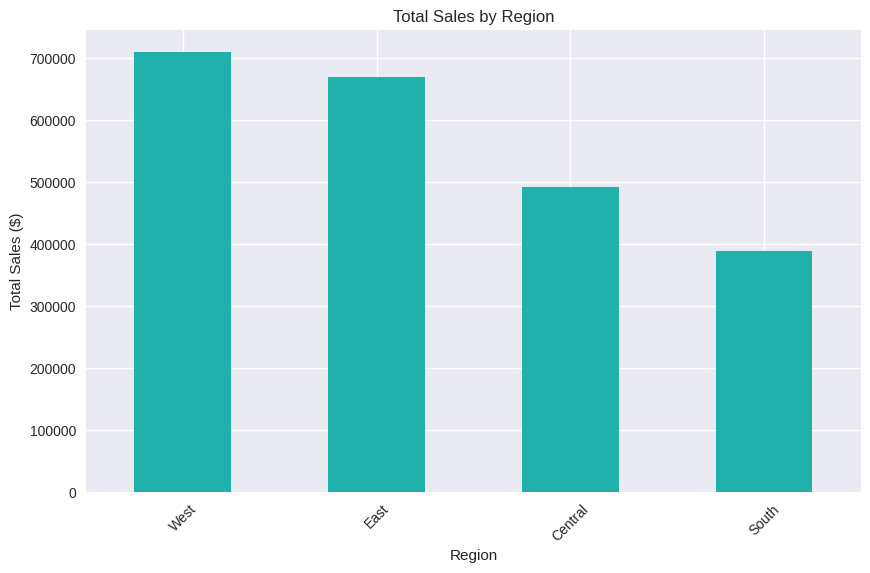

In [10]:
# 3. Sales by Region
plt.figure(figsize=(10, 6))
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='lightseagreen')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

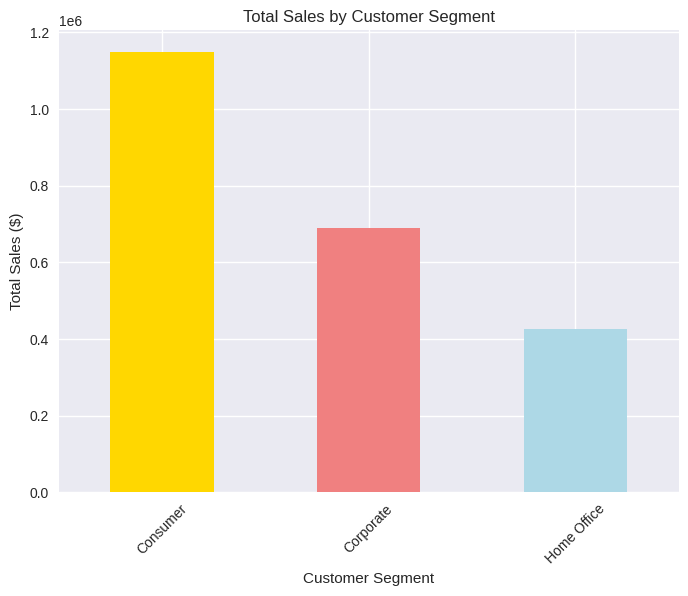

In [11]:
# 4. Sales by Segment
plt.figure(figsize=(8, 6))
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segment_sales.plot(kind='bar', color=['gold', 'lightcoral', 'lightblue'])
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

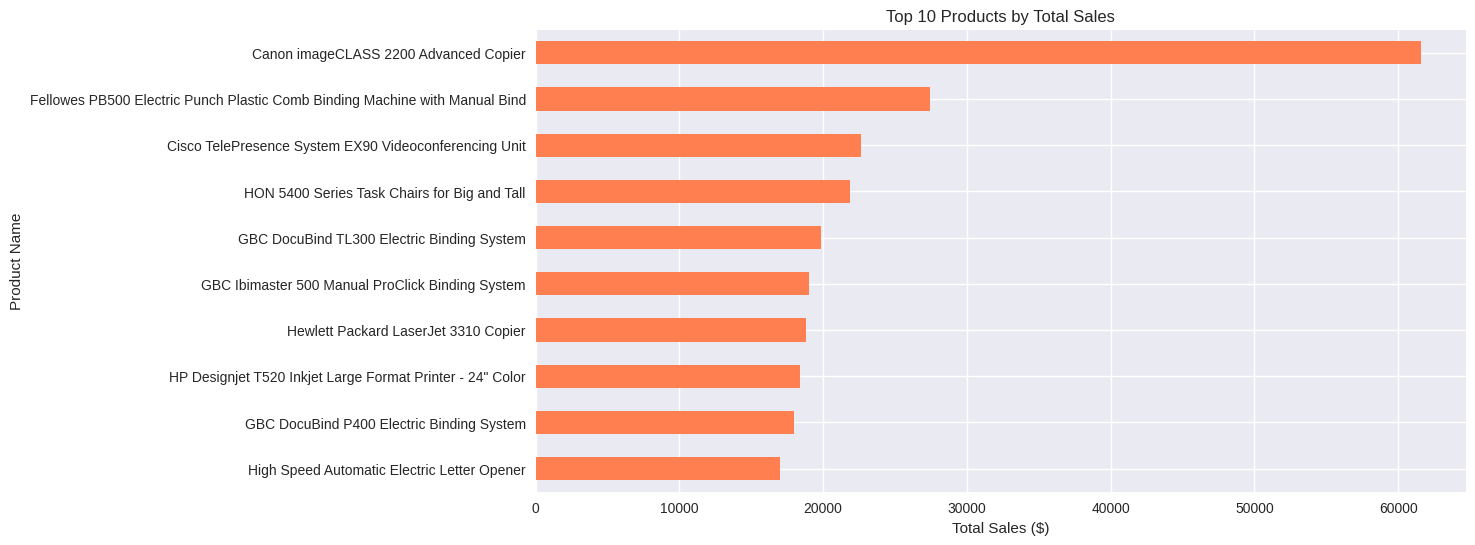

In [12]:
# 5. Top 10 Products by Sales
plt.figure(figsize=(12, 6))
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
top_products.plot(kind='barh', color='coral')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()
plt.show()

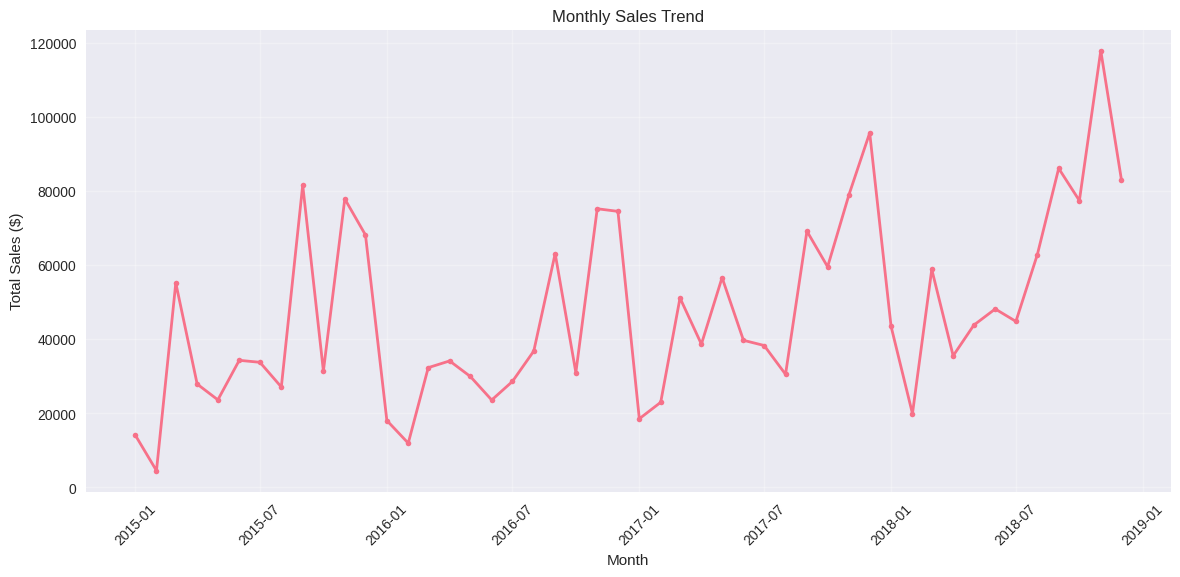

In [13]:
# 6. Monthly Sales Trend
plt.figure(figsize=(14, 6))
monthly_sales = df.groupby([df['Order Date'].dt.to_period('M')])['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linewidth=2, markersize=4)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

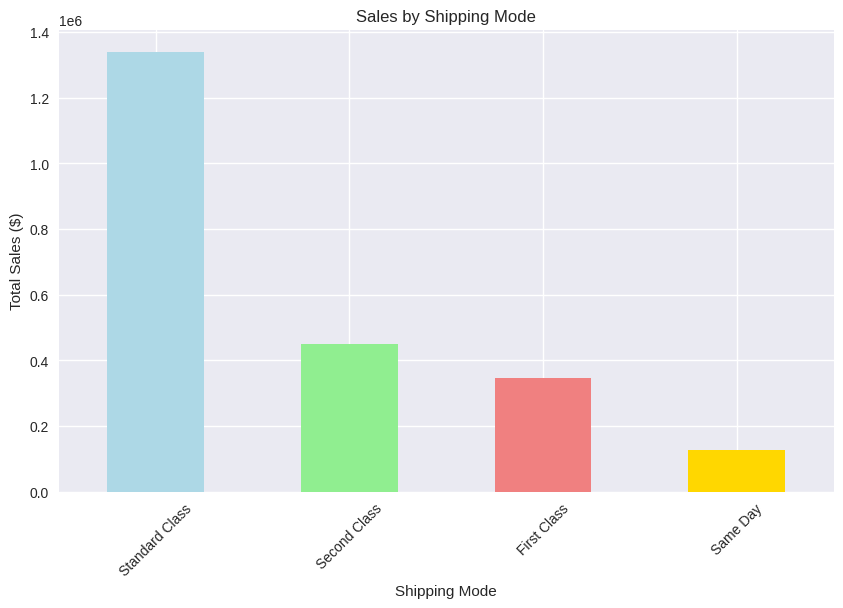

In [14]:
# 7. Shipping Mode Analysis
plt.figure(figsize=(10, 6))
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
ship_mode_sales.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
plt.title('Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()


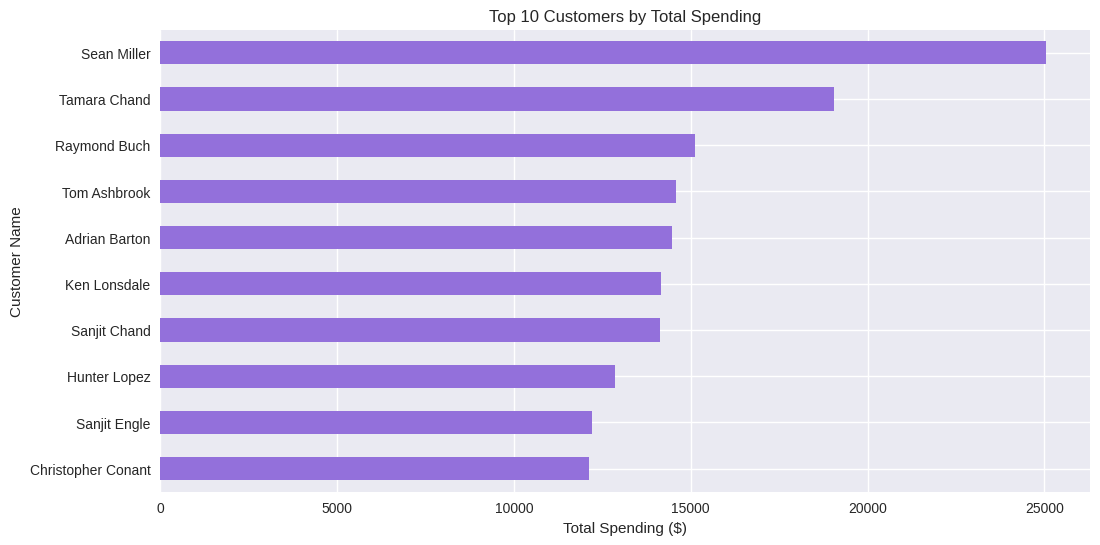

In [15]:
# 8. Top 10 Customers
plt.figure(figsize=(12, 6))
top_customers = df.groupby('Customer Name')['Sales'].sum().nlargest(10)
top_customers.plot(kind='barh', color='mediumpurple')
plt.title('Top 10 Customers by Total Spending')
plt.xlabel('Total Spending ($)')
plt.ylabel('Customer Name')
plt.gca().invert_yaxis()
plt.show()


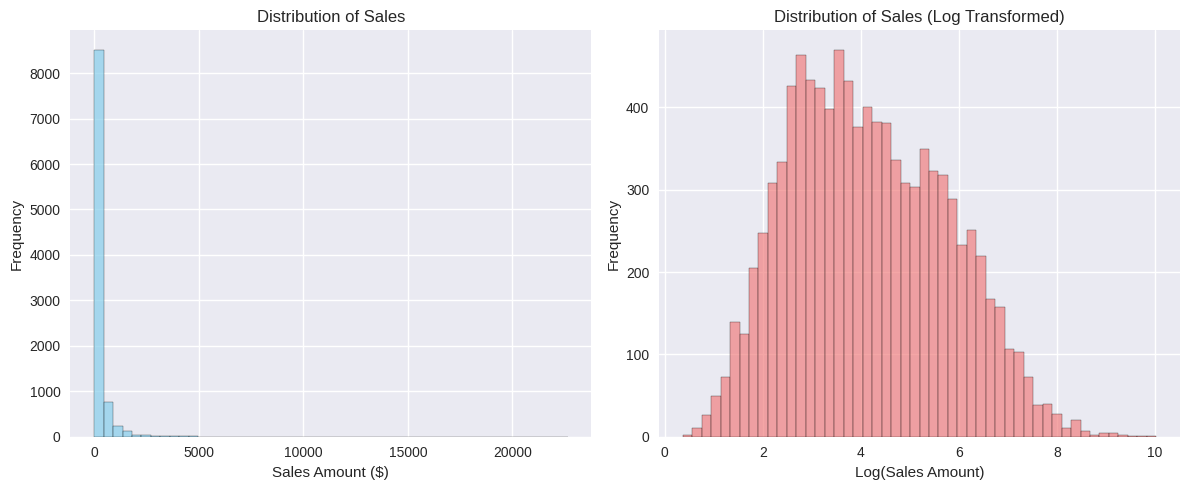

In [16]:
# 9. Sales Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Sales'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
# Log transform for better visualization of distribution
plt.hist(np.log1p(df['Sales']), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribution of Sales (Log Transformed)')
plt.xlabel('Log(Sales Amount)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

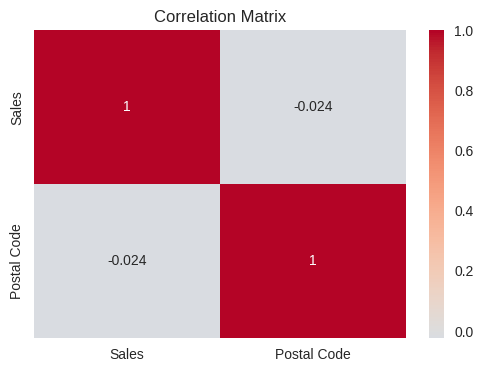

In [17]:
# 10. Correlation Analysis (for numerical columns)
numerical_cols = ['Sales', 'Postal Code']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Sales by Year
yearly_sales = df.groupby('Order Year')['Sales'].sum()
print("\nYearly Sales:")
for year, sales in yearly_sales.items():
    print(f"{year}: ${sales:,.2f}")


Yearly Sales:
2015: $479,856.21
2016: $459,436.01
2017: $600,192.55
2018: $722,052.02


<Figure size 1200x600 with 0 Axes>

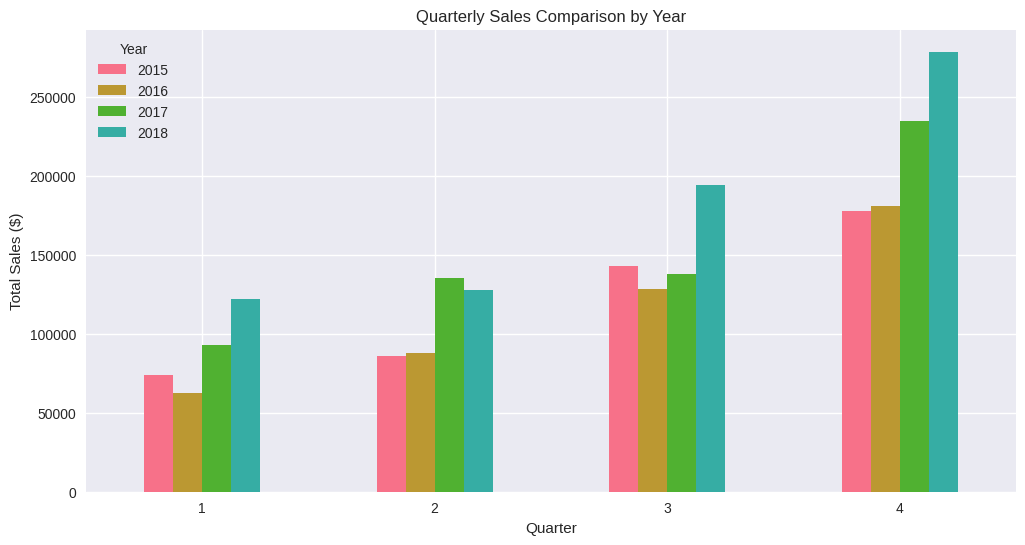

In [19]:
# Quarterly Sales Analysis
quarterly_sales = df.groupby(['Order Year', 'Order Quarter'])['Sales'].sum().reset_index()
pivot_quarterly = quarterly_sales.pivot(index='Order Quarter', columns='Order Year', values='Sales')

plt.figure(figsize=(12, 6))
pivot_quarterly.plot(kind='bar', figsize=(12, 6))
plt.title('Quarterly Sales Comparison by Year')
plt.xlabel('Quarter')
plt.ylabel('Total Sales ($)')
plt.legend(title='Year')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

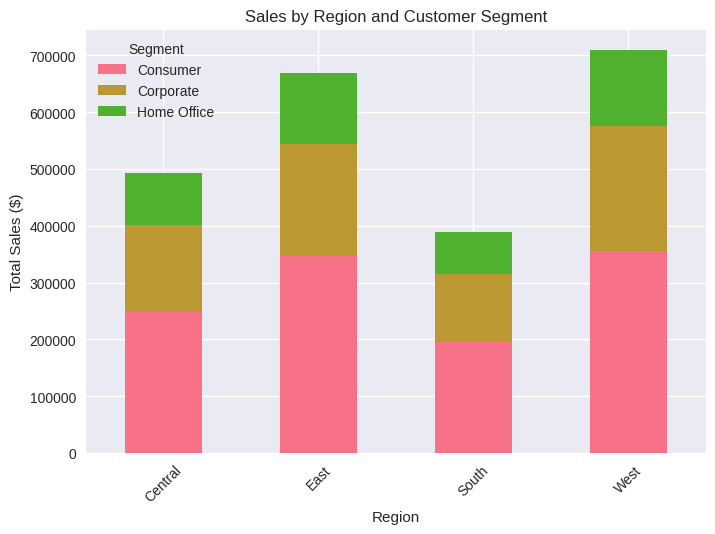

In [20]:
# Customer Segment Analysis by Region
segment_region = pd.crosstab(df['Region'], df['Segment'], values=df['Sales'], aggfunc='sum')

plt.figure(figsize=(12, 6))
segment_region.plot(kind='bar', stacked=True)
plt.title('Sales by Region and Customer Segment')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.legend(title='Segment')
plt.xticks(rotation=45)
plt.show()

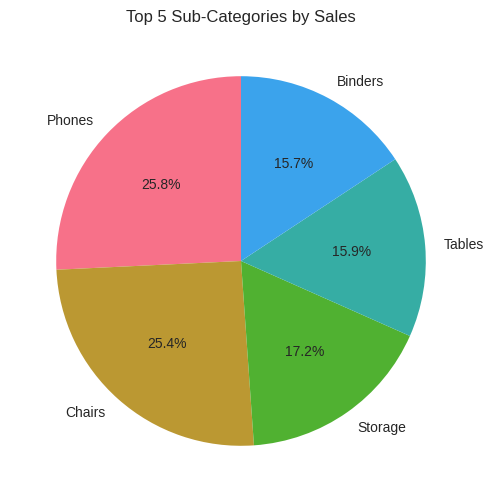

In [21]:
# Top 5 Sub-Categories by Sales
plt.figure(figsize=(12, 6))
top_subcategories = df.groupby('Sub-Category')['Sales'].sum().nlargest(5)
top_subcategories.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Sub-Categories by Sales')
plt.ylabel('')
plt.show()

In [22]:
# Summary Statistics
print("\n=== SUMMARY STATISTICS ===")
print(f"Total number of orders: {len(df)}")
print(f"Number of unique customers: {df['Customer ID'].nunique()}")
print(f"Number of unique products: {df['Product ID'].nunique()}")
print(f"Date range: {df['Order Date'].min().strftime('%Y-%m-%d')} to {df['Order Date'].max().strftime('%Y-%m-%d')}")
print(f"Most common shipping mode: {df['Ship Mode'].mode().iloc[0]}")
print(f"Most common customer segment: {df['Segment'].mode().iloc[0]}")

# Sales performance by month
monthly_performance = df.groupby('Order Month')['Sales'].agg(['sum', 'mean', 'count'])
print("\nMonthly Sales Performance:")
print(monthly_performance)

# Save processed data
df.to_csv('processed_sales_data.csv', index=False)
print("\nProcessed data saved to 'processed_sales_data.csv'")


=== SUMMARY STATISTICS ===
Total number of orders: 9800
Number of unique customers: 793
Number of unique products: 1861
Date range: 2015-01-03 to 2018-12-30
Most common shipping mode: Standard Class
Most common customer segment: Consumer

Monthly Sales Performance:
                     sum        mean  count
Order Month                                
1             94291.6296  257.627403    366
2             59371.1154  199.902745    297
3            197573.5872  290.549393    680
4            136283.0006  207.432269    657
5            154086.7237  212.533412    725
6            145837.5233  211.052856    691
7            145535.6890  208.802997    697
8            157315.9270  227.007110    693
9            300103.4117  221.642106   1354
10           199496.2947  246.596162    809
11           350161.7110  241.657496   1449
12           321480.1695  232.619515   1382

Processed data saved to 'processed_sales_data.csv'


In [24]:
# Time Series Forecasting Libraries
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# LSTM Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [26]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Sort by date
df = df.sort_values('Order Date')

# Create time series data (daily sales)
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales = daily_sales.set_index('Order Date')

print(f"Time series range: {daily_sales.index.min()} to {daily_sales.index.max()}")
print(f"Total days: {len(daily_sales)}")

Time series range: 2015-01-03 00:00:00 to 2018-12-30 00:00:00
Total days: 1230


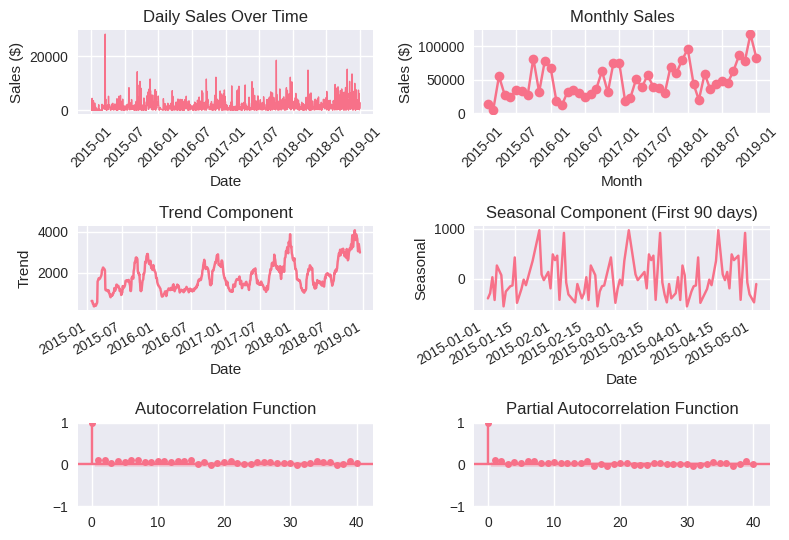

In [27]:
# Original time series
plt.subplot(3, 2, 1)
plt.plot(daily_sales.index, daily_sales['Sales'], linewidth=1)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)

# Monthly aggregated view
plt.subplot(3, 2, 2)
monthly_sales = daily_sales.resample('M').sum()
plt.plot(monthly_sales.index, monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)

# Seasonal decomposition
plt.subplot(3, 2, 3)
result = seasonal_decompose(daily_sales['Sales'], model='additive', period=30)
result.trend.plot(ax=plt.gca())
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')

plt.subplot(3, 2, 4)
result.seasonal.iloc[:90].plot(ax=plt.gca())  # First 90 days of seasonal pattern
plt.title('Seasonal Component (First 90 days)')
plt.xlabel('Date')
plt.ylabel('Seasonal')

# ACF and PACF plots
plt.subplot(3, 2, 5)
plot_acf(daily_sales['Sales'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(3, 2, 6)
plot_pacf(daily_sales['Sales'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

In [28]:
# Stationarity test
print("\n=== STATIONARITY TEST ===")
adf_test = adfuller(daily_sales['Sales'].dropna())
print(f'ADF Statistic: {adf_test[0]:.4f}')
print(f'p-value: {adf_test[1]:.4f}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'   {key}: {value:.4f}')

if adf_test[1] < 0.05:
    print("Series is stationary (reject null hypothesis)")
else:
    print("Series is non-stationary (fail to reject null hypothesis)")


=== STATIONARITY TEST ===
ADF Statistic: -5.7611
p-value: 0.0000
Critical Values:
   1%: -3.4357
   5%: -2.8639
   10%: -2.5680
Series is stationary (reject null hypothesis)


In [30]:
# Use monthly data for better stability in forecasting
monthly_data = daily_sales.resample('M').sum()

# Split data into train and test
train_size = int(len(monthly_data) * 0.8)
train_data = monthly_data[:train_size]
test_data = monthly_data[train_size:]

print(f"Training data: {len(train_data)} months")
print(f"Testing data: {len(test_data)} months")
print(f"Training period: {train_data.index.min()} to {train_data.index.max()}")
print(f"Testing period: {test_data.index.min()} to {test_data.index.max()}")


Training data: 38 months
Testing data: 10 months
Training period: 2015-01-31 00:00:00 to 2018-02-28 00:00:00
Testing period: 2018-03-31 00:00:00 to 2018-12-31 00:00:00


In [31]:
def evaluate_arima_model(train, test, order):
    """Evaluate ARIMA model with given parameters"""
    history = [x for x in train['Sales']]
    predictions = []

    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test['Sales'].iloc[t])

    return predictions

In [32]:
arima_orders = [(1,1,1), (2,1,2), (1,1,2)]

best_rmse = float('inf')
best_order = None
best_predictions = None

for order in arima_orders:
    try:
        predictions = evaluate_arima_model(train_data, test_data, order)
        rmse = np.sqrt(mean_squared_error(test_data['Sales'], predictions))
        mae = mean_absolute_error(test_data['Sales'], predictions)

        print(f"ARIMA{order} - RMSE: {rmse:,.2f}, MAE: {mae:,.2f}")

        if rmse < best_rmse:
            best_rmse = rmse
            best_order = order
            best_predictions = predictions
    except Exception as e:
        print(f"ARIMA{order} failed: {e}")

print(f"\nBest ARIMA model: ARIMA{best_order}")
print(f"Best RMSE: {best_rmse:,.2f}")

ARIMA(1, 1, 1) - RMSE: 23,254.60, MAE: 16,279.59
ARIMA(2, 1, 2) - RMSE: 23,608.17, MAE: 16,627.50
ARIMA(1, 1, 2) - RMSE: 23,791.92, MAE: 16,551.00

Best ARIMA model: ARIMA(1, 1, 1)
Best RMSE: 23,254.60


In [33]:
# Fit final ARIMA model on entire dataset for future forecasting
final_arima = ARIMA(monthly_data['Sales'], order=best_order)
final_arima_fit = final_arima.fit()

In [34]:
# Forecast next 6 months with ARIMA
arima_forecast_steps = 6
arima_forecast = final_arima_fit.forecast(steps=arima_forecast_steps)
arima_ci = final_arima_fit.get_forecast(steps=arima_forecast_steps).conf_int()

In [35]:
arima_forecast

,predicted_mean
2019-01-31,74121.352019
2019-02-28,71852.992032
2019-03-31,71275.437224
2019-04-30,71128.384041
2019-05-31,71090.942332
2019-06-30,71081.409172


In [36]:
arima_ci

,lower Sales,upper Sales
2019-01-31,26956.333212,121286.370827
2019-02-28,20932.303810,122773.680255
2019-03-31,18943.523161,123607.351287
2019-04-30,17800.609177,124456.158904
2019-05-31,16870.882147,125311.002518
2019-06-30,16004.291285,126158.527060


In [37]:
def create_dataset(data, look_back=3):
    """Create dataset for LSTM with look_back periods"""
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

In [38]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(monthly_data.values)

# Split into train and test
train_size_lstm = int(len(scaled_data) * 0.8)
train_lstm = scaled_data[:train_size_lstm]
test_lstm = scaled_data[train_size_lstm:]

# Create datasets
look_back = 3
X_train, y_train = create_dataset(train_lstm, look_back)
X_test, y_test = create_dataset(test_lstm, look_back)

In [39]:
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"LSTM Training shape: {X_train.shape}")
print(f"LSTM Testing shape: {X_test.shape}")

LSTM Training shape: (35, 3, 1)
LSTM Testing shape: (7, 3, 1)


In [40]:
# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

print("\nLSTM Model Summary:")
lstm_model.summary()


LSTM Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Train LSTM model
history = lstm_model.fit(
    X_train, y_train,
    batch_size=1,
    epochs=100,
    validation_data=(X_test, y_test),
    verbose=0,
    shuffle=False
)

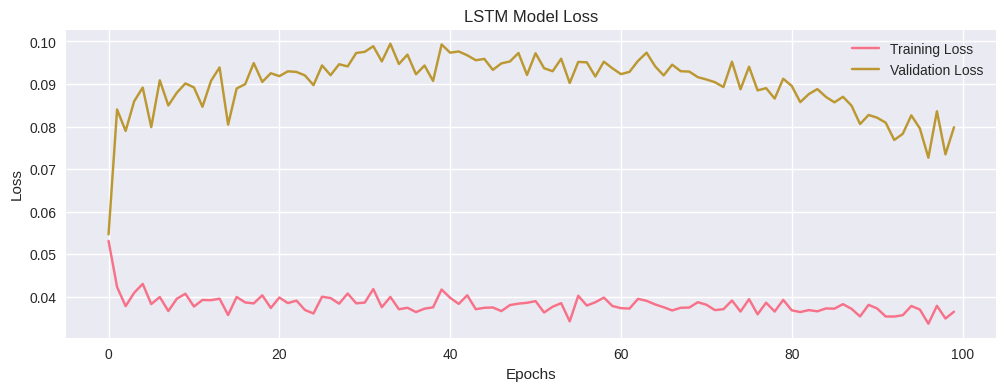

In [42]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
# Make predictions with LSTM
train_predict = lstm_model.predict(X_train)
test_predict = lstm_model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 881ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [44]:
test_predict

array([[0.3571618 ],
       [0.35962197],
       [0.35644543],
       [0.38864034],
       [0.43000433],
       [0.41496554],
       [0.50255144]], dtype=float32)

In [45]:
# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform([y_test])

In [46]:
# Calculate LSTM metrics
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual[0], test_predict[:,0]))
lstm_mae = mean_absolute_error(y_test_actual[0], test_predict[:,0])

print(f"\nLSTM Model Performance:")
print(f"RMSE: {lstm_rmse:,.2f}")
print(f"MAE: {lstm_mae:,.2f}")


LSTM Model Performance:
RMSE: 32,048.58
MAE: 24,444.68


In [47]:
# Forecast future values with LSTM
def forecast_lstm(model, last_sequence, steps, scaler):
    """Forecast future values using LSTM model"""
    forecasts = []
    current_sequence = last_sequence.copy()

    for _ in range(steps):
        # Predict next value
        next_pred = model.predict(current_sequence.reshape(1, look_back, 1), verbose=0)
        forecasts.append(next_pred[0,0])

        # Update sequence
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = next_pred[0,0]

    # Inverse transform
    forecasts = np.array(forecasts).reshape(-1, 1)
    return scaler.inverse_transform(forecasts)

In [48]:
# Get last sequence for forecasting
last_sequence = scaled_data[-look_back:].reshape(1, -1)
lstm_forecast_steps = 6
lstm_forecast = forecast_lstm(lstm_model, last_sequence, lstm_forecast_steps, scaler)


In [49]:
lstm_forecast

array([[51504.84 ],
       [46499.426],
       [45333.246],
       [45059.473],
       [44995.082],
       [44979.938]], dtype=float32)

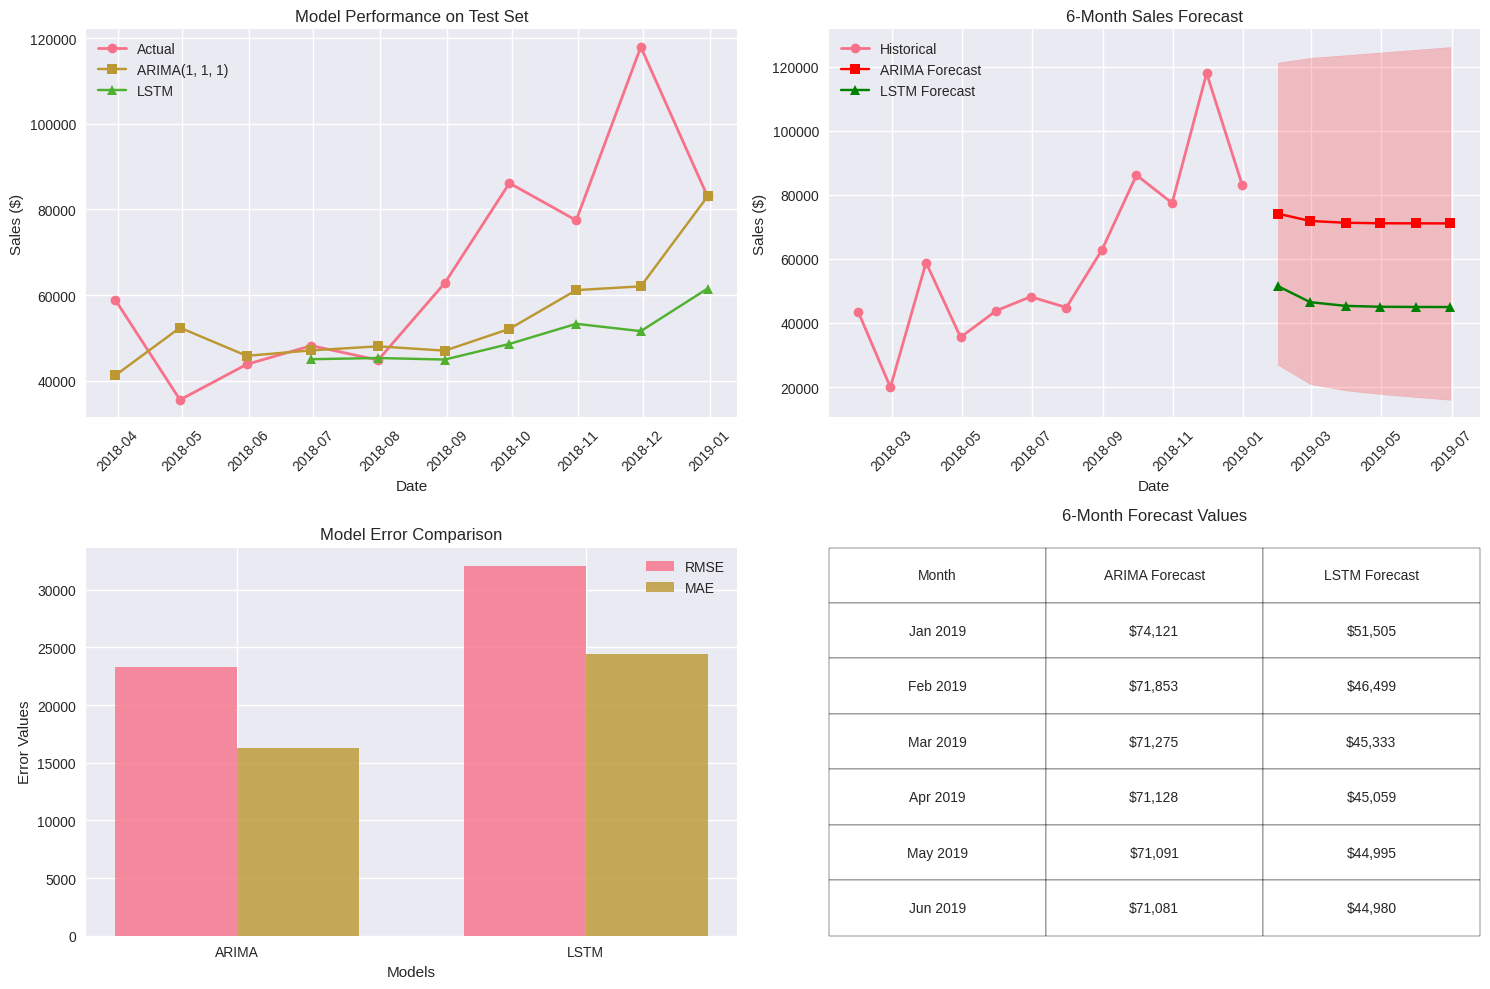

In [51]:
# Create future dates for forecasting
last_date = monthly_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),
                           periods=arima_forecast_steps, freq='M')

plt.figure(figsize=(15, 10))

# Plot 1: Model Comparison on Test Set
plt.subplot(2, 2, 1)
plt.plot(test_data.index, test_data['Sales'], label='Actual', marker='o', linewidth=2)
plt.plot(test_data.index, best_predictions, label=f'ARIMA{best_order}', marker='s')
plt.plot(test_data.index[look_back:], test_predict[:, 0], label='LSTM', marker='^')
plt.title('Model Performance on Test Set')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.xticks(rotation=45)

# Plot 2: Forecast Comparison
plt.subplot(2, 2, 2)
# Historical data (last 12 months)
historical_dates = monthly_data.index[-12:]
historical_sales = monthly_data['Sales'][-12:]

plt.plot(historical_dates, historical_sales, label='Historical', marker='o', linewidth=2)
plt.plot(future_dates, arima_forecast, label='ARIMA Forecast', marker='s', color='red')
plt.fill_between(future_dates, arima_ci.iloc[:, 0], arima_ci.iloc[:, 1], color='red', alpha=0.2)
plt.plot(future_dates, lstm_forecast.flatten(), label='LSTM Forecast', marker='^', color='green')
plt.title('6-Month Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.legend()
plt.xticks(rotation=45)

# Plot 3: Error Comparison
plt.subplot(2, 2, 3)
models = ['ARIMA', 'LSTM']
rmse_values = [best_rmse, lstm_rmse]
mae_values = [mean_absolute_error(test_data['Sales'], best_predictions), lstm_mae]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, rmse_values, width, label='RMSE', alpha=0.8)
plt.bar(x + width/2, mae_values, width, label='MAE', alpha=0.8)
plt.xlabel('Models')
plt.ylabel('Error Values')
plt.title('Model Error Comparison')
plt.xticks(x, models)
plt.legend()

# Plot 4: Forecast Values Table
plt.subplot(2, 2, 4)
plt.axis('off')

# Create forecast table
forecast_table = pd.DataFrame({
    'Month': [d.strftime('%b %Y') for d in future_dates],
    'ARIMA Forecast': [f'${x:,.0f}' for x in arima_forecast],
    'LSTM Forecast': [f'${x:,.0f}' for x in lstm_forecast.flatten()]
})

table = plt.table(cellText=forecast_table.values,
                colLabels=forecast_table.columns,
                cellLoc='center',
                loc='center',
                bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.title('6-Month Forecast Values', pad=20)

plt.tight_layout()
plt.show()

In [54]:
print(f"\nARIMA{best_order} Model:")
print(f"  - RMSE: ${best_rmse:,.2f}")
print(f"  - MAE: ${mean_absolute_error(test_data['Sales'], best_predictions):,.2f}")
print(f"  - Best for: Capturing linear trends and seasonal patterns")

print(f"\nLSTM Model:")
print(f"  - RMSE: ${lstm_rmse:,.2f}")
print(f"  - MAE: ${lstm_mae:,.2f}")
print(f"  - Best for: Capturing complex non-linear patterns")

# Determine which model performed better
if best_rmse < lstm_rmse:
    better_model = "ARIMA"
    better_forecast = arima_forecast
else:
    better_model = "LSTM"
    better_forecast = lstm_forecast.flatten()

print(f"\n Better performing model: {better_model}")

print(f"\nForecast Summary for next 6 months:")
print(f"Average monthly forecast: ${np.mean(better_forecast):,.2f}")
print(f"Total forecasted sales: ${np.sum(better_forecast):,.2f}")

# Business Recommendations
print(f"\n BUSINESS RECOMMENDATIONS:")
print("1. Monitor the forecasted sales trend for inventory planning")
print("2. Consider seasonal factors that might affect sales")
print("3. Use both models for robust forecasting with confidence intervals")
print("4. Regularly update models with new data for improved accuracy")

# Save forecasts to CSV
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'ARIMA_Forecast': arima_forecast,
    'ARIMA_Lower_CI': arima_ci.iloc[:, 0],
    'ARIMA_Upper_CI': arima_ci.iloc[:, 1],
    'LSTM_Forecast': lstm_forecast.flatten()
})

forecast_df.to_csv('sales_forecasts.csv', index=False)
print(f"\nForecasts saved to 'sales_forecasts.csv'")


ARIMA(1, 1, 1) Model:
  - RMSE: $23,254.60
  - MAE: $16,279.59
  - Best for: Capturing linear trends and seasonal patterns

LSTM Model:
  - RMSE: $32,048.58
  - MAE: $24,444.68
  - Best for: Capturing complex non-linear patterns

 Better performing model: ARIMA

Forecast Summary for next 6 months:
Average monthly forecast: $71,758.42
Total forecasted sales: $430,550.52

 BUSINESS RECOMMENDATIONS:
1. Monitor the forecasted sales trend for inventory planning
2. Consider seasonal factors that might affect sales
3. Use both models for robust forecasting with confidence intervals
4. Regularly update models with new data for improved accuracy

Forecasts saved to 'sales_forecasts.csv'
